#### What features influence an anime to have a higher value than others?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_anime = pd.read_csv("anime.csv")

In [3]:
#View the dataset
df_anime

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,ONA,Unknown,"Apr 4, 2021 to ?",Unknown,...,Unknown,Unknown,Unknown,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17558,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,TV,Unknown,2021 to ?,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17559,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,TV,Unknown,"Jul, 2021 to ?",Summer 2021,...,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17560,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",Unknown,ヤマノススメ Next Summit,TV,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


In [4]:
df_anime.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [5]:
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

# DATA CLEANING
New columns will be created 

Aired ->Start Year

PREMIERED -> ONLY SEASON

DURATION -> DURATION IN MINUTES

We will eliminate the columns that will not serve us for this exploratory analysis

# AIRED

I will create the column called "Start year", where will be the year where the anime was released 

In [6]:
df_anime['Start year'] = df_anime['Aired'].apply(lambda x : x.split('to')[0]).apply(
                          lambda x : x.split(',')).apply(
                          lambda x : x[1] if len(x) > 1 else x[0] ).apply(
                          lambda x : x.replace(' ', ''))

# PREMIERED

I will create the column called "Anime season", where are the variables: fall, winter, spring, summer. What is the time when the new anime come out

In [7]:
df_anime['Anime season'] = df_anime['Premiered'].apply(lambda x : x.split(' ')[0])

# DURATION

I will create a column called "Duration in minutes", where are the number of minutes that the anime lasted

In [8]:
df_anime['Duration in minutes'] = df_anime['Duration'].apply(lambda x : x.split(' ')).apply(lambda x : x[0] if len(x) <= 1 else 
        (x[0] if x[1] == 'min.' else
        (int(x[0]) / 60 if x[1] == 'sec.' else 
        (int(x[0]) * 60 if x[1] == 'hr.' and len(x) < 3 else
        (int(x[0]) * 60 + int(x[2]) if x[1] == 'hr.' and x[2] != 'per' else 
         int(x[0]) * 60  )))))

# DATA TRANSFORMATION

In [9]:
#We will eliminate the columns that will not serve us for this exploratory analysis 
df_anime.drop(['MAL_ID','Name' , 'English name' , 'Japanese name' , 'Aired', 'Members','Premiered', 'Favorites', 
               'Duration','Watching', 'Completed', 'On-Hold', 'Dropped', 'Ranked', 'Popularity',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'] , axis = 1 , inplace = True)

In [10]:
#We will eliminate the rows that have a score as "Unknown" because they may be animes that have just been released or because it was not valued
index_name_eliminate = df_anime[df_anime['Score'] == 'Unknown'].index

df_anime.drop(index_name_eliminate , inplace = True)

In [11]:
#Replace the Unknown variable (which was not a null but an object) to Null
df_anime['Start year'] = df_anime['Start year'].replace('Unknown' , '999999999') #99999999999 to know that it is a null value
df_anime['Duration in minutes'] = df_anime['Duration in minutes'].replace('Unknown' , np.nan) 
df_anime['Anime season'] = df_anime['Anime season'].replace('Unknown' , pd.NA)
df_anime['Type'] = df_anime['Type'].replace('Unknown' , pd.NA)
df_anime['Episodes'] = df_anime['Episodes'].replace('Unknown' , '999999999') #99999999999 to know that it is a null value
df_anime['Source'] = df_anime['Source'].replace('Unknown' , pd.NA)
df_anime['Rating'] = df_anime['Rating'].replace('Unknown' , pd.NA)


In [12]:
#The data type where it should be int or float is object , so we change it to int or float , respectively.
df_anime.Score = df_anime.Score.astype('float')
df_anime['Duration in minutes'] = df_anime['Duration in minutes'].astype('float')
df_anime['Episodes'] = df_anime['Episodes'].astype('float')

In [13]:
#Replace values 99999999999 with pd.NA
df_anime['Start year'] = df_anime['Start year'].replace('999999999' , pd.NA)
df_anime['Episodes'] = df_anime['Episodes'].replace(999999999 , 0)

# ONE-DIMENSIONAL ANALYSIS

In [14]:
df_anime.head()

,Score,Genres,Type,Episodes,Producers,Licensors,Studios,Source,Rating,Start year,Anime season,Duration in minutes
0,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26.0,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,R - 17+ (violence & profanity),1998,Spring,24.0
1,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1.0,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,R - 17+ (violence & profanity),2001,<NA>,115.0
2,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,26.0,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,PG-13 - Teens 13 or older,1998,Spring,24.0
3,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",TV,26.0,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,PG-13 - Teens 13 or older,2002,Summer,25.0
4,6.98,"Adventure, Fantasy, Shounen, Supernatural",TV,52.0,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,PG - Children,2004,Fall,23.0


In [15]:
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12421 entries, 0 to 17552
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Score                12421 non-null  float64
 1   Genres               12421 non-null  object 
 2   Type                 12421 non-null  object 
 3   Episodes             12421 non-null  float64
 4   Producers            12421 non-null  object 
 5   Licensors            12421 non-null  object 
 6   Studios              12421 non-null  object 
 7   Source               10443 non-null  object 
 8   Rating               12310 non-null  object 
 9   Start year           12414 non-null  object 
 10  Anime season         3813 non-null   object 
 11  Duration in minutes  12398 non-null  float64
dtypes: float64(3), object(9)
memory usage: 1.2+ MB


In [16]:
df_anime.describe()

,Score,Episodes,Duration in minutes
count,12421.000000,12421.000000,12398.000000
mean,6.509999,11.233395,26.572381
std,0.886717,42.628964,25.358223
min,1.850000,0.000000,0.050000
25%,5.930000,1.000000,9.000000
50%,6.520000,2.000000,24.000000
75%,7.140000,12.000000,29.000000
max,9.190000,1818.000000,163.000000


In [17]:
df_anime.columns

Index(['Score', 'Genres', 'Type', 'Episodes', 'Producers', 'Licensors',
       'Studios', 'Source', 'Rating', 'Start year', 'Anime season',
       'Duration in minutes'],
      dtype='object')

Numerical variables: 'Score' , 'Episodes', 'Duration in minutes'

Categorical variables: 'Genres' , 'Type' , 'Producers' , 'Licensors' , 'Studios' , 'Source' , 'Rating' , 'Start year' , 'Anime season'.



## NUMERICS

### SCORE

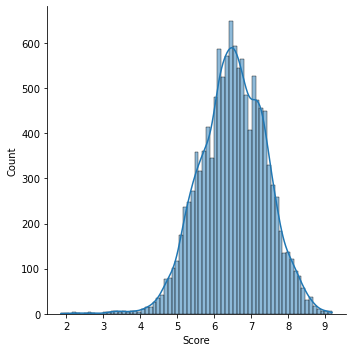

In [18]:
#View data distribution
sns.displot(data = df_anime , x = 'Score' , kde = True)

##### Most of the animes are rated between 5 to 8

<AxesSubplot:ylabel='Score'>

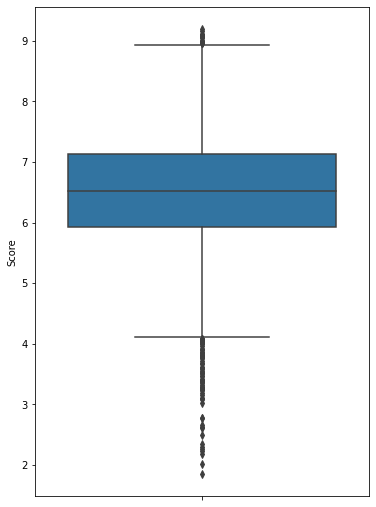

In [19]:
plt.figure(figsize=(6,9))
sns.boxplot(data = df_anime , y = 'Score')

#### The score has outliers, either maximum or minimum values. I can affirm that more than 50% of my data has a score of more than 6.

### Episodes

In [20]:
df_anime.Episodes.describe()

count    12421.000000
mean        11.233395
std         42.628964
min          0.000000
25%          1.000000
50%          2.000000
75%         12.000000
max       1818.000000
Name: Episodes, dtype: float64

<AxesSubplot:ylabel='Episodes'>

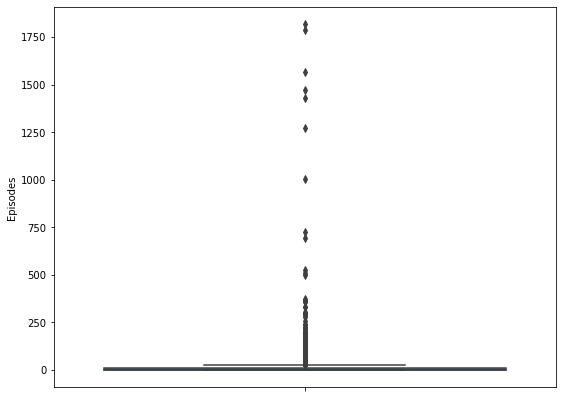

In [21]:
plt.figure(figsize=(9,7))
sns.boxplot(data = df_anime , y = 'Episodes'  )

#### 75% of my data only comes in 12 or more chapters. This is usually the standard number of chapters an anime has.

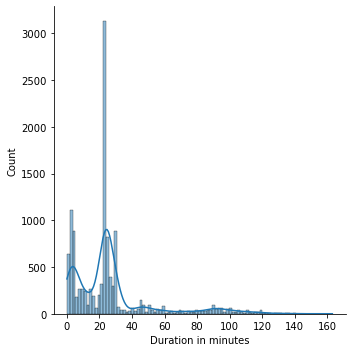

In [22]:
#View data distribution
sns.displot(data = df_anime , x = 'Duration in minutes' , kde = True)

#### The distribution tells us that most of our data is between 20 and 40 minutes.

<AxesSubplot:ylabel='Duration in minutes'>

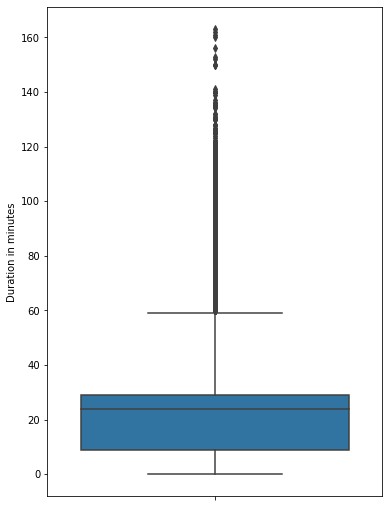

In [23]:
plt.figure(figsize=(6,9))
sns.boxplot(data = df_anime , y = 'Duration in minutes')

#### There are outliers . There are anime that have 60 to more minutes . These can be anime movies. While 50% of my data is about 23 minutes (which is ideal) in an anime series, there are outliers.

# CATEGORIES

In [24]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

### Genres

#### Here we separate the genres to have a better analysis of them. Since they were in a list

In [25]:
df_anime['Genres_Split'] = df_anime['Genres'].apply(lambda x : x.replace(' ' , ''))
df_anime['Genres_Split'] = df_anime['Genres_Split'].apply(lambda x : x.split(','))

In [26]:
gs_top10 = to_1D(df_anime['Genres_Split']).value_counts().head(10).index
ngs_top10  = to_1D(df_anime['Genres_Split']).value_counts().head(10)

In [27]:
#TOP 10 NUMBER OF ANIME BY GENRE
ngs_top10

Comedy         4559
Action         3312
Fantasy        2452
Adventure      2288
Sci-Fi         2185
Drama          2051
Shounen        1796
Romance        1724
School         1433
SliceofLife    1370
dtype: int64

<AxesSubplot:>

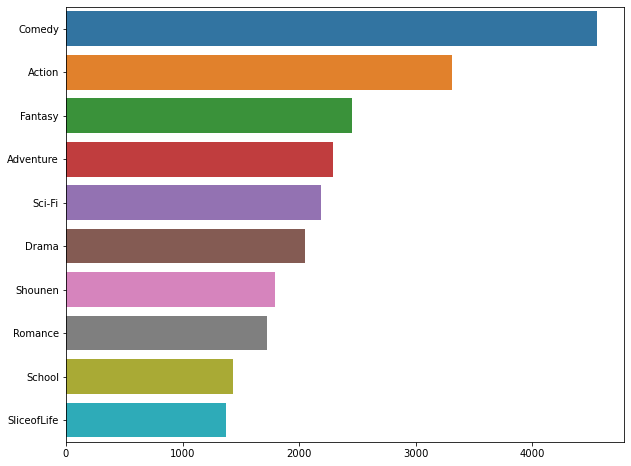

In [30]:
#TOP 10 OF SEPARATE GENRES 

plt.figure(figsize=(10,8))

sns.barplot(y = gs_top10 , x = ngs_top10 )

#### In the dataset there are more comedy genres

### Type

In [31]:
df_anime['Type'].value_counts()

TV         3837
OVA        2999
Movie      2017
Special    1754
ONA        1084
Music       730
Name: Type, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Type'>

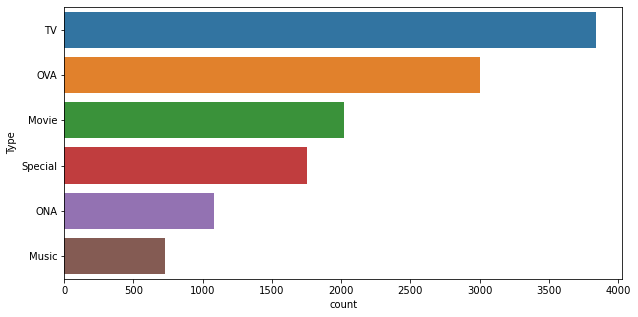

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(data = df_anime , y = 'Type' , order = df_anime['Type'].value_counts().index)

#### There are more TV type anime in the dataset

### Producers

In [33]:
#As with the genres column, the same is done in this producers column.
df_anime['Producers_Split'] = df_anime['Producers'].apply(lambda x : x.replace(' ' , ''))
df_anime['Producers_Split']= df_anime['Producers_Split'].apply(lambda x : x.split(','))

In [34]:
#The [1 : 11] , is because there are nulls that are categorized as Unknown.
producer_top10 = to_1D(df_anime['Producers_Split']).value_counts()[1:11].index
nproducer_top10  = to_1D(df_anime['Producers_Split']).value_counts()[1:11]

In [35]:
#TOP 10 PRODUCERS WHO HAVE MADE THE MOST ANIMES 
nproducer_top10

Aniplex         476
Lantis          436
TVTokyo         436
BandaiVisual    393
Movic           323
PonyCanyon      288
Sotsu           288
AT-X            285
Dentsu          281
FujiTV          266
dtype: int64

<AxesSubplot:>

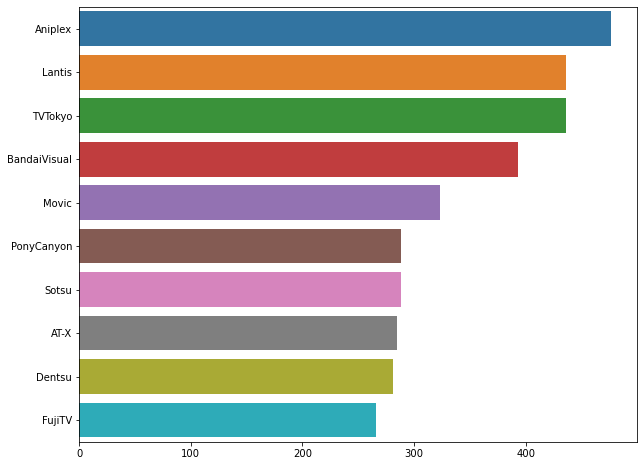

In [36]:
plt.figure(figsize=(10,8))

sns.barplot(y = producer_top10 , x = nproducer_top10 )

#### Aniplex has produced the most anime according to the dataset.

### LICENSORS

In [37]:
#As in the genres and producers columns, the separation of the following is carried out
df_anime['Licensors_Split'] = df_anime['Licensors'].apply(lambda x : x.replace(' ' , ''))
df_anime['Licensors_Split']= df_anime['Licensors_Split'].apply(lambda x : x.split(','))

In [38]:
#The [1 : 11] , is because there are nulls that are categorized as Unknown.
licensors_top10 = to_1D(df_anime['Licensors_Split']).value_counts()[1:11].index
nlicensors_top10  = to_1D(df_anime['Licensors_Split']).value_counts()[1:11]

In [39]:
#TOP 10 of the licensors who have made the most animes
nlicensors_top10

Funimation                1116
SentaiFilmworks            743
DiscotekMedia              360
ADVFilms                   292
MediaBlasters              271
BandaiEntertainment        201
AniplexofAmerica           192
GeneonEntertainmentUSA     174
VIZMedia                   173
NozomiEntertainment        134
dtype: int64

<AxesSubplot:>

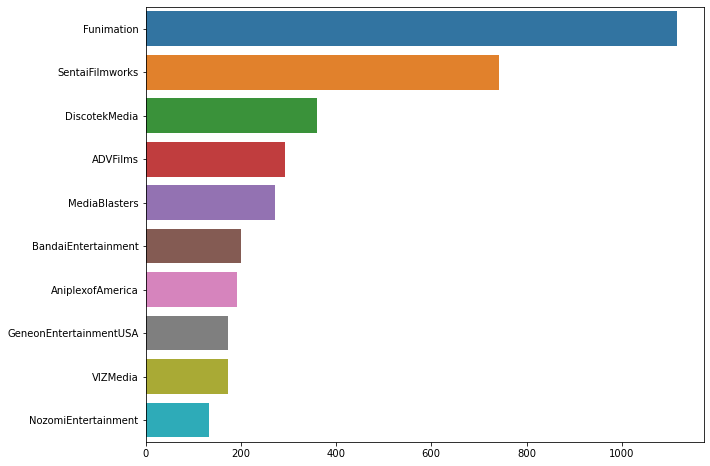

In [40]:
plt.figure(figsize=(10,8))

sns.barplot(y = licensors_top10 , x = nlicensors_top10 )

#### We can see that funimation has the most licenses in anime.

### Studios

In [41]:
df_anime['Studios_Split'] = df_anime['Studios'].apply(lambda x : x.replace(' ' , ''))
df_anime['Studios_Split']= df_anime['Studios_Split'].apply(lambda x : x.split(','))

In [42]:
studios_top10 = to_1D(df_anime['Studios_Split']).value_counts()[1:11].index
nstudios_top10  = to_1D(df_anime['Studios_Split']).value_counts()[1:11]

In [43]:
nstudios_top10

ToeiAnimation       604
Sunrise             464
Madhouse            355
J.C.Staff           346
ProductionI.G       312
StudioDeen          262
StudioPierrot       232
TMSEntertainment    226
OLM                 207
A-1Pictures         201
dtype: int64

<AxesSubplot:>

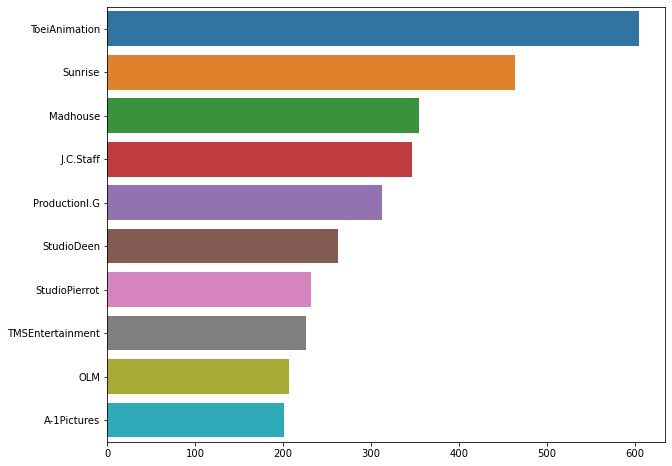

In [44]:
plt.figure(figsize=(10,8))

sns.barplot(y = studios_top10 , x = nstudios_top10 )

#### ToeAnimation is the studio with the most anime in the world

### Source

In [45]:
source_top10 = df_anime['Source'].value_counts().head(10).index
nsource_top10 = df_anime['Source'].value_counts().head(10)

In [46]:
nsource_top10

Manga           3413
Original        3083
Visual novel     976
Game             725
Light novel      709
Novel            401
Other            313
4-koma manga     249
Music            203
Web manga        190
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source'>

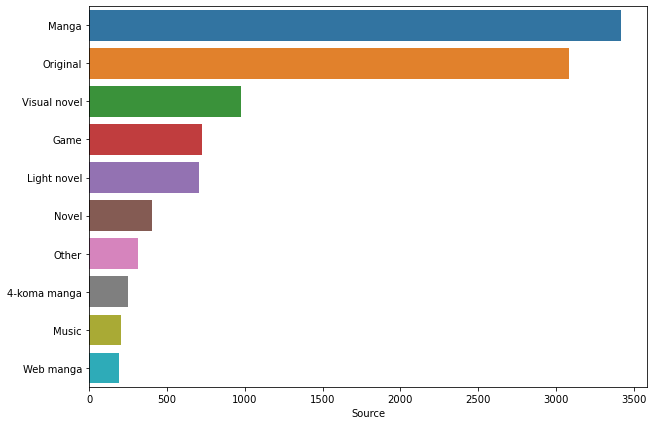

In [47]:
plt.figure(figsize=(10,7))
sns.barplot( x = nsource_top10 , y= source_top10)

#### In the dataset there are more anime that come from manga . Then follow the anime that are from original source.

### Rating

In [48]:
df_anime['Rating'].value_counts()

PG-13 - Teens 13 or older         5456
G - All Ages                      2663
Rx - Hentai                       1328
R - 17+ (violence & profanity)    1080
R+ - Mild Nudity                   917
PG - Children                      866
Name: Rating, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Rating'>

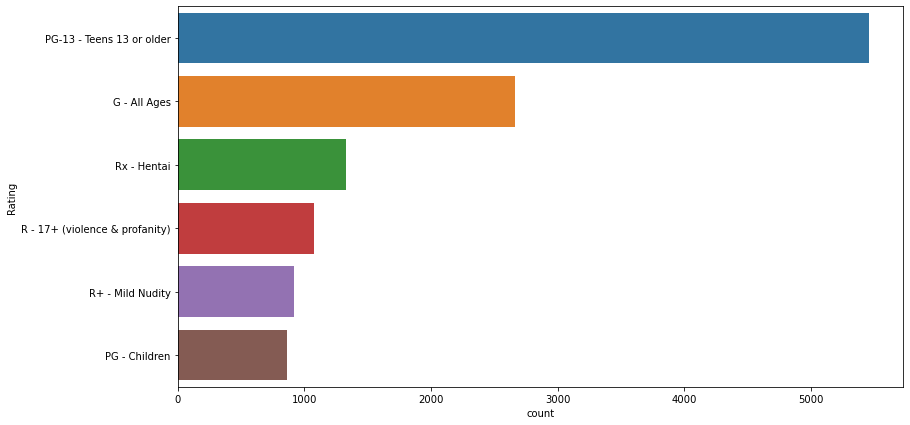

In [49]:
plt.figure(figsize=(13,7))
sns.countplot(data = df_anime , y = 'Rating' , order = df_anime['Rating'].value_counts().index)

In [50]:
pip install squarify

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [51]:
import squarify

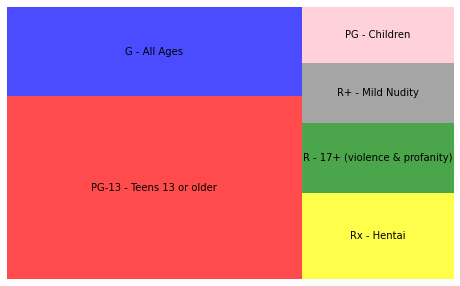

In [52]:
plt.figure(figsize=(8,5))
color = ['red' , 'blue','yellow','green','gray','pink']
squarify.plot(sizes = df_anime['Rating'].value_counts(),  label = df_anime['Rating'].value_counts().index, alpha=0.7 , color = color,
              text_kwargs={'fontsize':10})
plt.axis('off')
plt.show()

#### Most anime are for people 13 and older.

### Start year

In [53]:
df_anime['Start year'].unique()

array(['1998', '2001', '2002', '2004', '2005', '1999', '2003', '1995',
       '1997', '1996', '1988', '1993', '2000', '1979', '1989', '1991',
       '1985', '1986', '1994', '1992', '1990', '1978', '1973', '2006',
       '1987', '1984', '1982', '1977', '1983', '1980', '1976', '1968',
       '1981', '2007', '1971', '1967', '1975', '1962', '1969', '1965',
       '1974', '1964', '2008', '1972', '1970', '1966', '1963', '1945',
       '2009', '2012', '1933', '1929', '1943', '2010', '1931', '1932',
       '1934', '1936', '1928', '1960', '1958', '2011', '1959', '1930',
       '1947', '1917', '1935', '1938', '1939', '1941', '1942', '1948',
       '1950', '1957', '1961', '1918', '1924', '1926', '1927', '1940',
       '1944', '1946', '1952', '1954', '1956', '2016', '2013', '2019',
       '2014', '2015', '2017', '2018', '1925', '1949', '1937', <NA>,
       '2021', '2020'], dtype=object)

In [54]:
syear_top10 = df_anime['Start year'].value_counts().head(10).index

nsyear_top10 = df_anime['Start year'].value_counts().head(10)

In [55]:
nsyear_top10

2016    683
2017    652
2018    638
2014    638
2015    590
2013    572
2012    567
2019    523
2011    512
2010    455
Name: Start year, dtype: int64

<AxesSubplot:xlabel='Start year'>

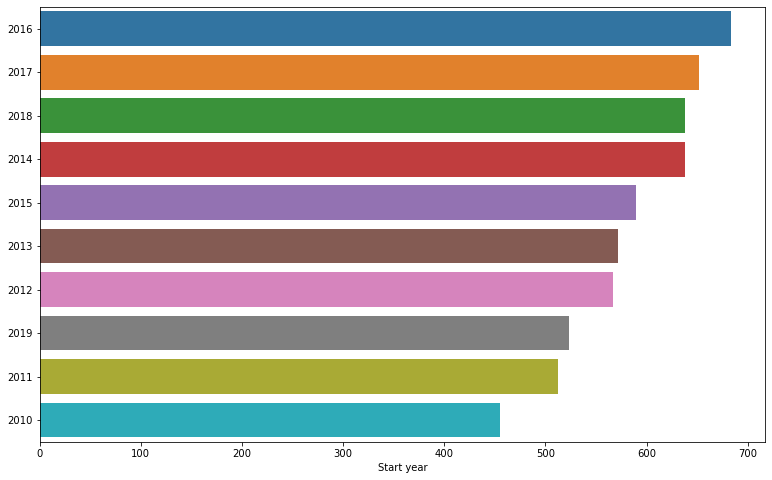

In [56]:
plt.figure(figsize=(13,8))

sns.barplot(y = syear_top10 , x = nsyear_top10 )

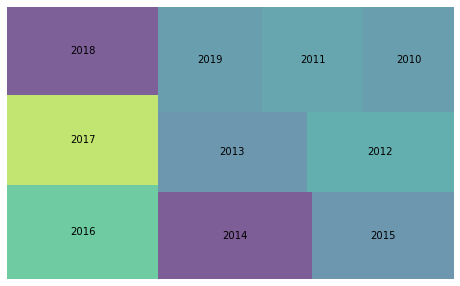

In [57]:
plt.figure(figsize=(8,5))
squarify.plot(sizes = nsyear_top10,  label = syear_top10, alpha=0.7)
plt.axis('off')
plt.show()

#### 2016 was the year that the most anime were released . This was followed by 2017

### Anime Season

In [58]:
animeseason = df_anime['Anime season'].value_counts().head(10).index

nanimeseason = df_anime['Anime season'].value_counts().head(10)

In [59]:
nanimeseason

Spring    1234
Fall      1131
Winter     795
Summer     653
Name: Anime season, dtype: int64

<AxesSubplot:xlabel='Anime season'>

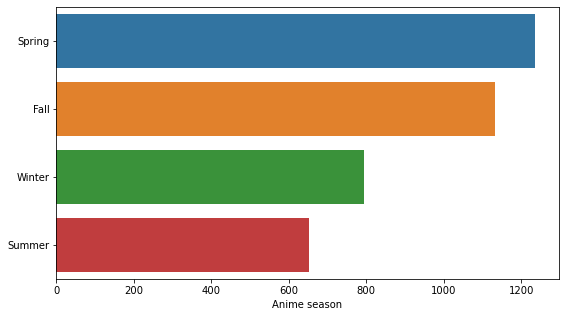

In [60]:
plt.figure(figsize=(9,5))

sns.barplot(y = animeseason, x = nanimeseason )

# ANALISIS BIDIMENSIONAL

In [61]:
#Function to extract the data of the other columns with respect to the separated genders.

def get_data(col_index_name , col_target_name): #Col name is the column to which we want to extract the data.

  datos = [] #Store the data
  cont = 0
  index_column = df_anime.columns.get_loc(col_target_name) #To know the index of the desired column

  for list_gen in df_anime[col_index_name]:

    for gen in list_gen:
        
        val = df_anime.iloc[cont , index_column ] #Find the value of the desired column 
        datos.append(val) #Store values from the value to the data list

    cont += 1   


  return pd.Series(datos)




## Score v Episodes

#### A correlation will be made between these values

In [62]:
df_anime['Episodes'].corr(df_anime['Score'] , method = 'spearman')

0.29428430586124077

#### It has a moderate positive correlation

<AxesSubplot:xlabel='Episodes', ylabel='Score'>

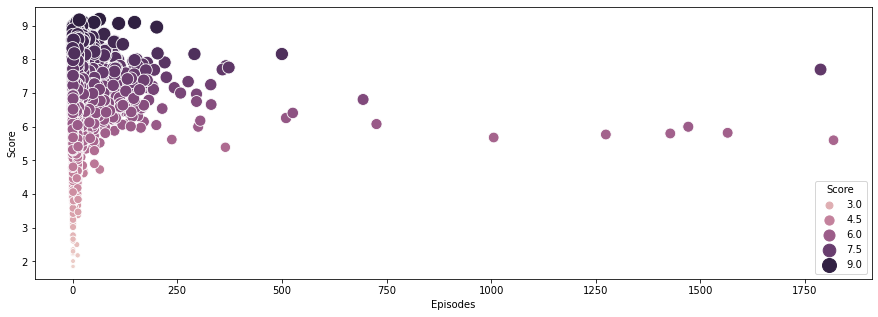

In [63]:
plt.figure(figsize=(15,5))
sns.scatterplot(data = df_anime , x = 'Episodes' , y= 'Score' , hue = 'Score' , size = 'Score' , sizes = (20,200))

#### I can say that as the number of episodes increases, it does not mean that it will have a higher value. So the number of episodes does not influence . It may be that a good anime can have 12 chapters and be very good . Or it does not mean by having many chapters , it will have better valuation .

## Score v Duration in minutes

In [64]:
df_anime['Score'].corr(df_anime['Duration in minutes'] , method = 'spearman')

0.2971661791245515

#### It has a moderate positive correlation

<AxesSubplot:xlabel='Duration in minutes', ylabel='Score'>

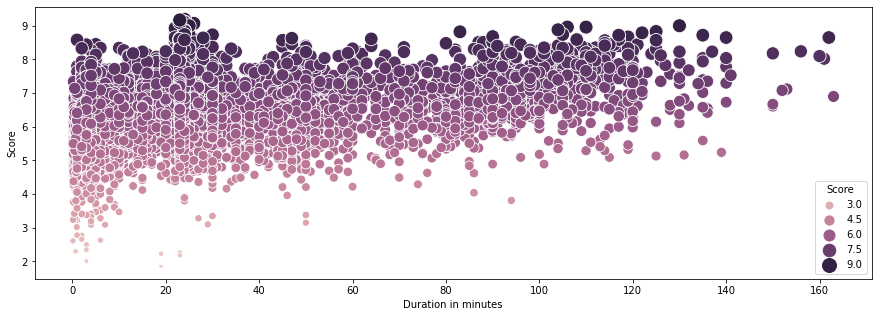

In [65]:
plt.figure(figsize=(15,5))
sns.scatterplot(data = df_anime , x = 'Duration in minutes' , y= 'Score' , hue = 'Score' , size = 'Score' , sizes = (20,200))

#### As the length of the chapters increases, the rating of the anime increases slightly, as it has a positive upward correlation.

## Genres v Score

#### Now we want to see the boxplot with the top 10 genres that we have previously taken out.

In [66]:
score_get = get_data('Genres_Split' , 'Score')

In [67]:
df_anime_aux2 = pd.DataFrame()

In [68]:
#We create the dataset df_anime_aux2 where the genres will be separated with their score and start year respectively.
df_anime_aux2['Genres'] = to_1D(df_anime['Genres_Split'])
df_anime_aux2['Score'] = score_get
df_anime_aux2.head()

,Genres,Score
0,Action,8.78
1,Adventure,8.78
2,Comedy,8.78
3,Drama,8.78
4,Sci-Fi,8.78


#### NOW WE WILL LOOK AT THE TOP 10 MOST VALUED GENRES ACCORDING TO THE MEDIAN

In [69]:
#TOP 10 MOST HIGHLY VALUED GENRES
gen_score__median_top10  = df_anime_aux2.groupby(['Genres'] , 
                                  as_index=False).agg({'Score' : 'median'}).sort_values('Score' , ascending = False).head(10)
                                  
gen_score__median_top10

,Genres,Score
39,Thriller,7.405
21,Mystery,7.210
24,Psychological,7.150
23,Police,7.120
32,Shounen,7.080
14,Josei,7.040
6,Drama,7.020
29,Seinen,7.020
38,Supernatural,6.990
37,SuperPower,6.980


#### The most valuable genre according to users was Thriller with a median of 7.405 .

## BOXPLOT OF ALL GENRES IN ORDER

<AxesSubplot:xlabel='Score', ylabel='Genres'>

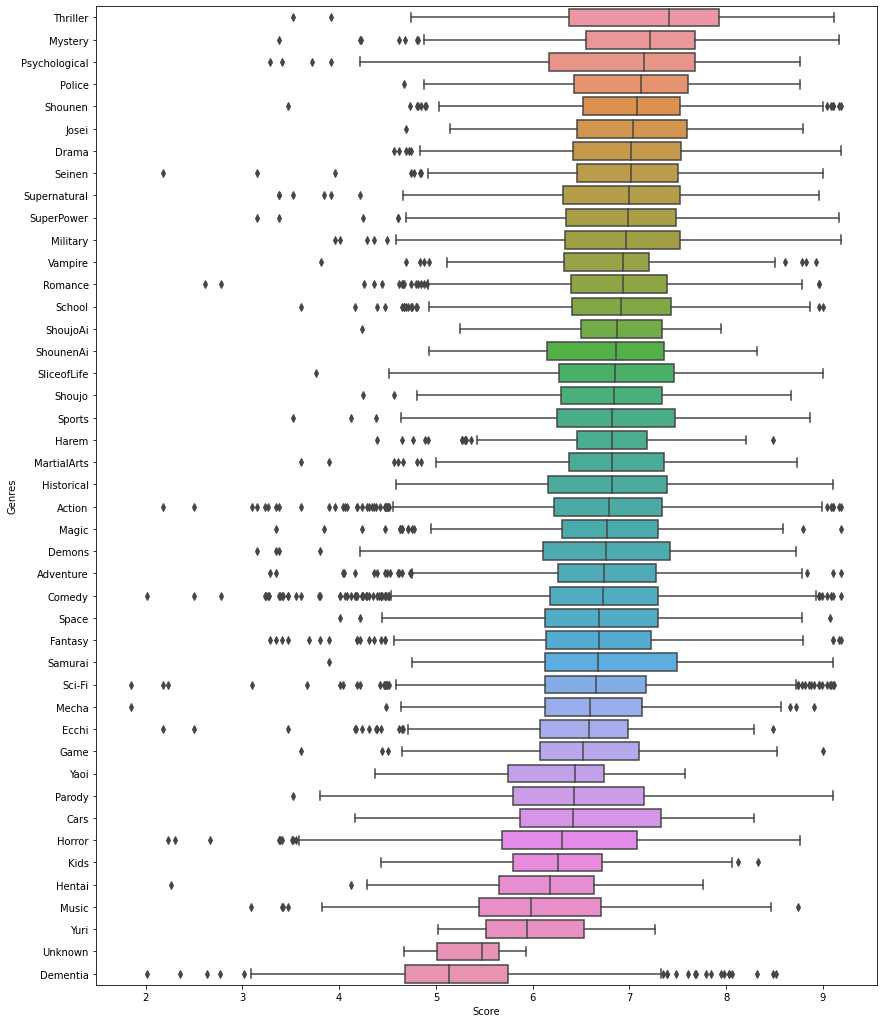

In [70]:
#View boxplot with these genres
order_graph = df_anime_aux2.groupby(['Genres'] , 
                                  as_index=False).agg({'Score' : 'median'}).sort_values('Score' , ascending = False)
plt.figure(figsize=(14,18))
sns.boxplot(y= 'Genres', x = 'Score' , data= df_anime_aux2 ,
            order = order_graph['Genres'])

#### We can observe that anime with Thriller genre are the most valued.

### BOX PLOT OF THE TOP 10 GENRES

In [72]:
#To filter in pandas the genres column with the top 10 above
fil = df_anime_aux2[df_anime_aux2['Genres'].isin(gen_score__median_top10['Genres'])]
fil

,Genres,Score
3,Drama,8.78
7,Drama,8.39
8,Mystery,8.39
15,Drama,8.24
16,Shounen,8.24
...,...,...
38971,Mystery,4.81
38972,Psychological,4.81
38973,Supernatural,4.81
38974,Thriller,4.81


In [73]:
fil['Genres'].value_counts()

Drama            2051
Shounen          1796
Supernatural     1300
Seinen            725
Mystery           643
SuperPower        521
Psychological     318
Police            211
Thriller          114
Josei              91
Name: Genres, dtype: int64

<AxesSubplot:xlabel='Genres', ylabel='Score'>

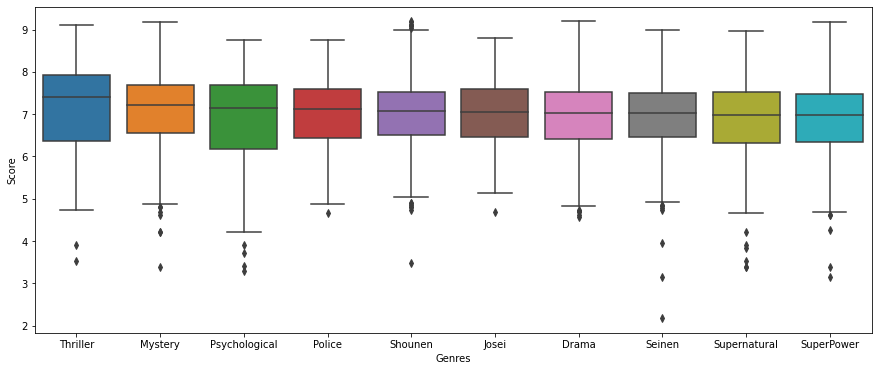

In [74]:
#View boxplot with these genres
plt.figure(figsize=(15,6))
sns.boxplot(x= 'Genres', y = 'Score' , data= fil , order = gen_score__median_top10['Genres'] )

#### Here we can see that the Thriller genre is more highly valued than the other genres.

In [75]:
#FILTER WITH THE TOP10 GENRES
filgenres_top10 = df_anime_aux2[df_anime_aux2['Genres'].isin(gs_top10)]
filgenres_top10

,Genres,Score
0,Action,8.78
1,Adventure,8.78
2,Comedy,8.78
3,Drama,8.78
4,Sci-Fi,8.78
...,...,...
38968,Romance,7.52
38969,SliceofLife,6.83
38970,Comedy,6.83
38975,Shounen,4.81


In [76]:
gen_score__median_top10  = filgenres_top10.groupby(['Genres'] , 
                                  as_index=False).agg({'Score' : 'median'}).sort_values('Score' , ascending = False)

gen_score__median_top10

,Genres,Score
8,Shounen,7.08
3,Drama,7.02
5,Romance,6.93
6,School,6.91
9,SliceofLife,6.85
0,Action,6.79
1,Adventure,6.74
2,Comedy,6.73
4,Fantasy,6.68
7,Sci-Fi,6.65


<AxesSubplot:xlabel='Genres', ylabel='Score'>

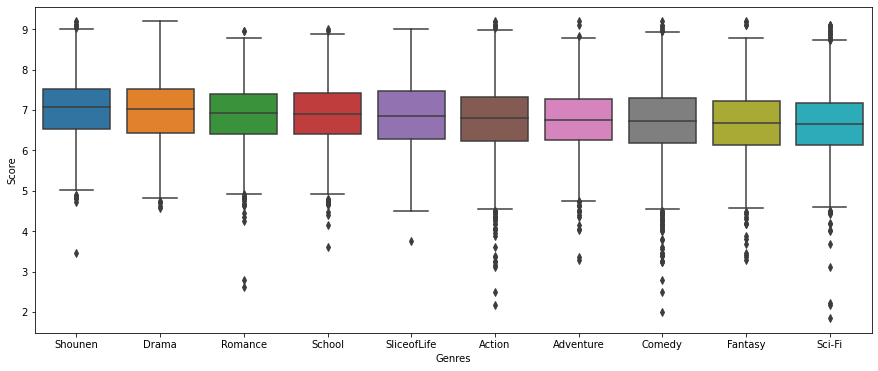

In [77]:
#BOXPLOT OF TOP10 GENRES
plt.figure(figsize=(15,6))
sns.boxplot(x= 'Genres' , y = 'Score', data = filgenres_top10 , order= gen_score__median_top10['Genres'] )